In [1]:
import gym
import cv2
import numpy as np

In [2]:
env = gym.make('Freeway-v0')

In [3]:
type(env)

gym.wrappers.time_limit.TimeLimit

# Gym

## Space

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space.n

3

In [6]:
[env.action_space.sample() for _ in range(10)]

[0, 1, 0, 1, 1, 2, 0, 2, 0, 0]

## Game Environment Setup

In [7]:
env.reset()
env.render()

True

## Step

In [8]:
next_state, reward, done, info = env.step(action=env.action_space.sample())
env.render()

True

In [9]:
next_state

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [10]:
next_state.shape

(210, 160, 3)

In [11]:
reward

0.0

In [12]:
done

False

In [13]:
info

{'ale.lives': 0}

In [14]:
env.action_space.shape

()

In [15]:
env.observation_space.shape

(210, 160, 3)

# to black and white

In [16]:
bw = cv2.cvtColor(next_state, cv2.COLOR_RGB2GRAY)
bw

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
bw.shape

(210, 160)

# resize

In [18]:
res = cv2.resize(bw, (84, 84))
res

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,  36,  36,  36],
       [  0,   0,   0, ..., 142, 142, 142],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [19]:
res.shape

(84, 84)

# stacking frames

In [22]:
states = [None] * 4

for index in range(4):
    next_state, reward, done, info = env.step(action=env.action_space.sample())
    env.render()
    states[index] = next_state

In [23]:
# mildly faster than moveaxis, but changes flips the image. this may not be a problem though
black_buffer = np.array([cv2.resize(cv2.cvtColor(x, cv2.COLOR_RGB2GRAY), (84, 84)) for x in states]).T

In [24]:
black_buffer = np.moveaxis([cv2.resize(cv2.cvtColor(x, cv2.COLOR_RGB2GRAY), (84, 84)) for x in states], 0, -1)

In [25]:
black_buffer

array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [ 36,  36,  36,  36],
        [ 36,  36,  36,  36],
        [ 36,  36,  36,  36]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [142, 142, 142, 142],
        [142, 142, 142, 142],
        [142, 142, 142, 142]],

       ...,

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0

In [26]:
black_buffer.shape

(84, 84, 4)

In [27]:
from PIL import Image

def matrix_to_image(image: np.ndarray, channel_range: tuple=(0, 255)) -> Image:
    """
    Convert the input matrix to an image.
    Args:
        image: the matrix of shape [height, width, channel] to convert
        channel_range: the range to clip the channel values to (inclusive)
    Returns:
        an image from the pixels in the image array
    """
    # clip the values in the image to the boundary [0, 255]. This is the
    # legal range for channel values. Image uses a method called 'to bytes'
    # to compress the input array into a simpler binary representation for
    # graphics processing. As such, convert the type to a single byte to
    # satisfy this constraint.
    image = np.clip(image, *channel_range).astype('uint8')

    return Image.fromarray(image)

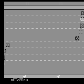

In [32]:
matrix_to_image(black_buffer[:, :, 3])

## Run Loop

In [27]:
# randomly sample moves until forever

for _ in range(1000):
    env.step(action=env.action_space.sample())
    env.render()